In [147]:
# libs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [148]:
# data read
df = pd.read_csv("train.csv")

In [149]:
# basic statistics
df.shape

(1460, 81)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [151]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [152]:
# clean missing value
percent_missing = df.isnull().sum()*100/len(df)
percent_missing = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
percent_missing.sort_values("percent_missing").tail(10)

,column_name,percent_missing
GarageFinish,GarageFinish,5.547945
GarageYrBlt,GarageYrBlt,5.547945
GarageType,GarageType,5.547945
GarageCond,GarageCond,5.547945
LotFrontage,LotFrontage,17.739726
FireplaceQu,FireplaceQu,47.260274
Fence,Fence,80.753425
Alley,Alley,93.767123
MiscFeature,MiscFeature,96.301370
PoolQC,PoolQC,99.520548


In [153]:
df = df.drop(["PoolQC","MiscFeature","Alley","Fence"], axis = 1)

In [154]:
df.shape

(1460, 77)

In [155]:
df["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [156]:
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

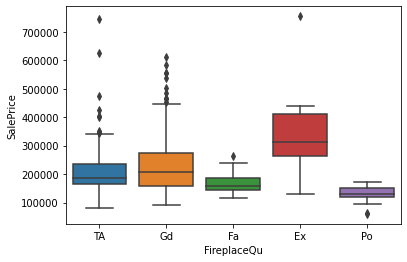

In [157]:
sns.boxplot(x = "FireplaceQu", y = "SalePrice", data = df)

# Basic stats 
 - Total columns = 81 & Total rows = 1460
 - Numerical columns = 38 & categorical columns = 43
 - Target variable = SalePrice
 - More than 80% values missing in columns (Fence, Alley, MiscFeature, PoolQC)
 - After dropping them, total columns = 77, total rows = 1460

# Target Variable "SalePrice"

/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

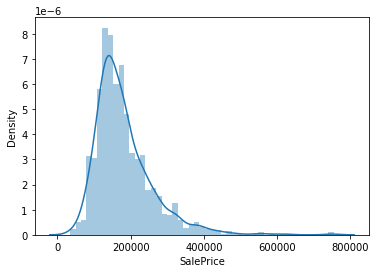

In [158]:
# Sale Price check
sns.distplot(df["SalePrice"])

In [185]:
skew = df["SalePrice"].skew()
kurtosis = df["SalePrice"].kurtosis()
mean = df["SalePrice"].mean()
max_ = df["SalePrice"].max()
min_ = df["SalePrice"].min()
print(f"Skew => {skew}")
print(f"Kurtosis => {kurtosis}")
print(f"Mean => {mean}")
print(f"Max => {max_}")
print(f"Min => {min_}")

Skew => 1.8828757597682129
Kurtosis => 6.536281860064529
Mean => 180921.19589041095
Max => 755000
Min => 34900


/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

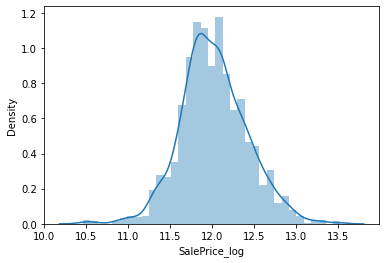

In [186]:
df["SalePrice_log"] = np.log(df["SalePrice"] +1)
sns.distplot(df["SalePrice_log"])

## SalePrice transformation
 - Values of skewness and kurtosis are quite high
 - Log Transformation done
 - Irregularities removed

# Correlation check

In [187]:
# Corr check
corr_value = df.corr()["SalePrice_log"]
corr_value = corr_value[abs(corr_value)> 0.5]
corr_value = list(corr_value.index)

In [188]:
corr_value

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'SalePrice_log']

In [189]:
categorical_col = list(df.select_dtypes(include = ['object']).columns)
final_columns = corr_value+categorical_col
df = df[final_columns]
df.shape

(1460, 52)

In [190]:
final_columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'SalePrice_log',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

## Correlation insights
- columns with correlation value > 0.5 have been filtered
- list of final columns containing categorical and filtered numerical columns created
- total columns = 52

# Data Categorization 

In [848]:
# Divide the data into multiple sections
quality     = ["OverallQual","RoofMatl","ExterQual","BsmtQual","KitchenQual","FireplaceQu",
               "GarageQual","HeatingQC","SalePrice_log","SalePrice"]

condition   = ["YearBuilt","YearRemodAdd","GarageYrBlt","Condition1","Condition2","ExterCond",
               "BsmtCond","GarageCond","Functional","SalePrice"]

design      = ["LotShape","LotConfig","GarageType","BsmtExposure","GarageFinish","Foundation","SalePrice",
               "PavedDrive","SalePrice_log","Exterior1st","Exterior2nd","BsmtFinType1","BsmtFinType2","MasVnrType"]

space       = ["GarageArea","GrLivArea","TotRmsAbvGrd","TotalBsmtSF","1stFlrSF","GarageCars","SalePrice_log"]

amenities   = ["FullBath","Heating","CentralAir","Electrical","SalePrice_log"]

access      = ["Street","Utilities","Neighborhood","SalePrice_log"]

description = ["MSZoning","LandSlope","BldgType","HouseStyle","RoofStyle","SaleType",
               "SaleCondition","SalePrice_log","LandContour","SalePrice"]


# EDA for Category "Quality"

In [780]:
# Perform EDA for each
df_quality = df[quality]

In [781]:
df_quality.shape

(1460, 10)

In [746]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   RoofMatl       1460 non-null   object 
 2   ExterQual      1460 non-null   object 
 3   BsmtQual       1423 non-null   object 
 4   KitchenQual    1460 non-null   object 
 5   FireplaceQu    770 non-null    object 
 6   GarageQual     1379 non-null   object 
 7   HeatingQC      1460 non-null   object 
 8   SalePrice_log  1460 non-null   float64
 9   SalePrice      1460 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 114.2+ KB


/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice_log'>

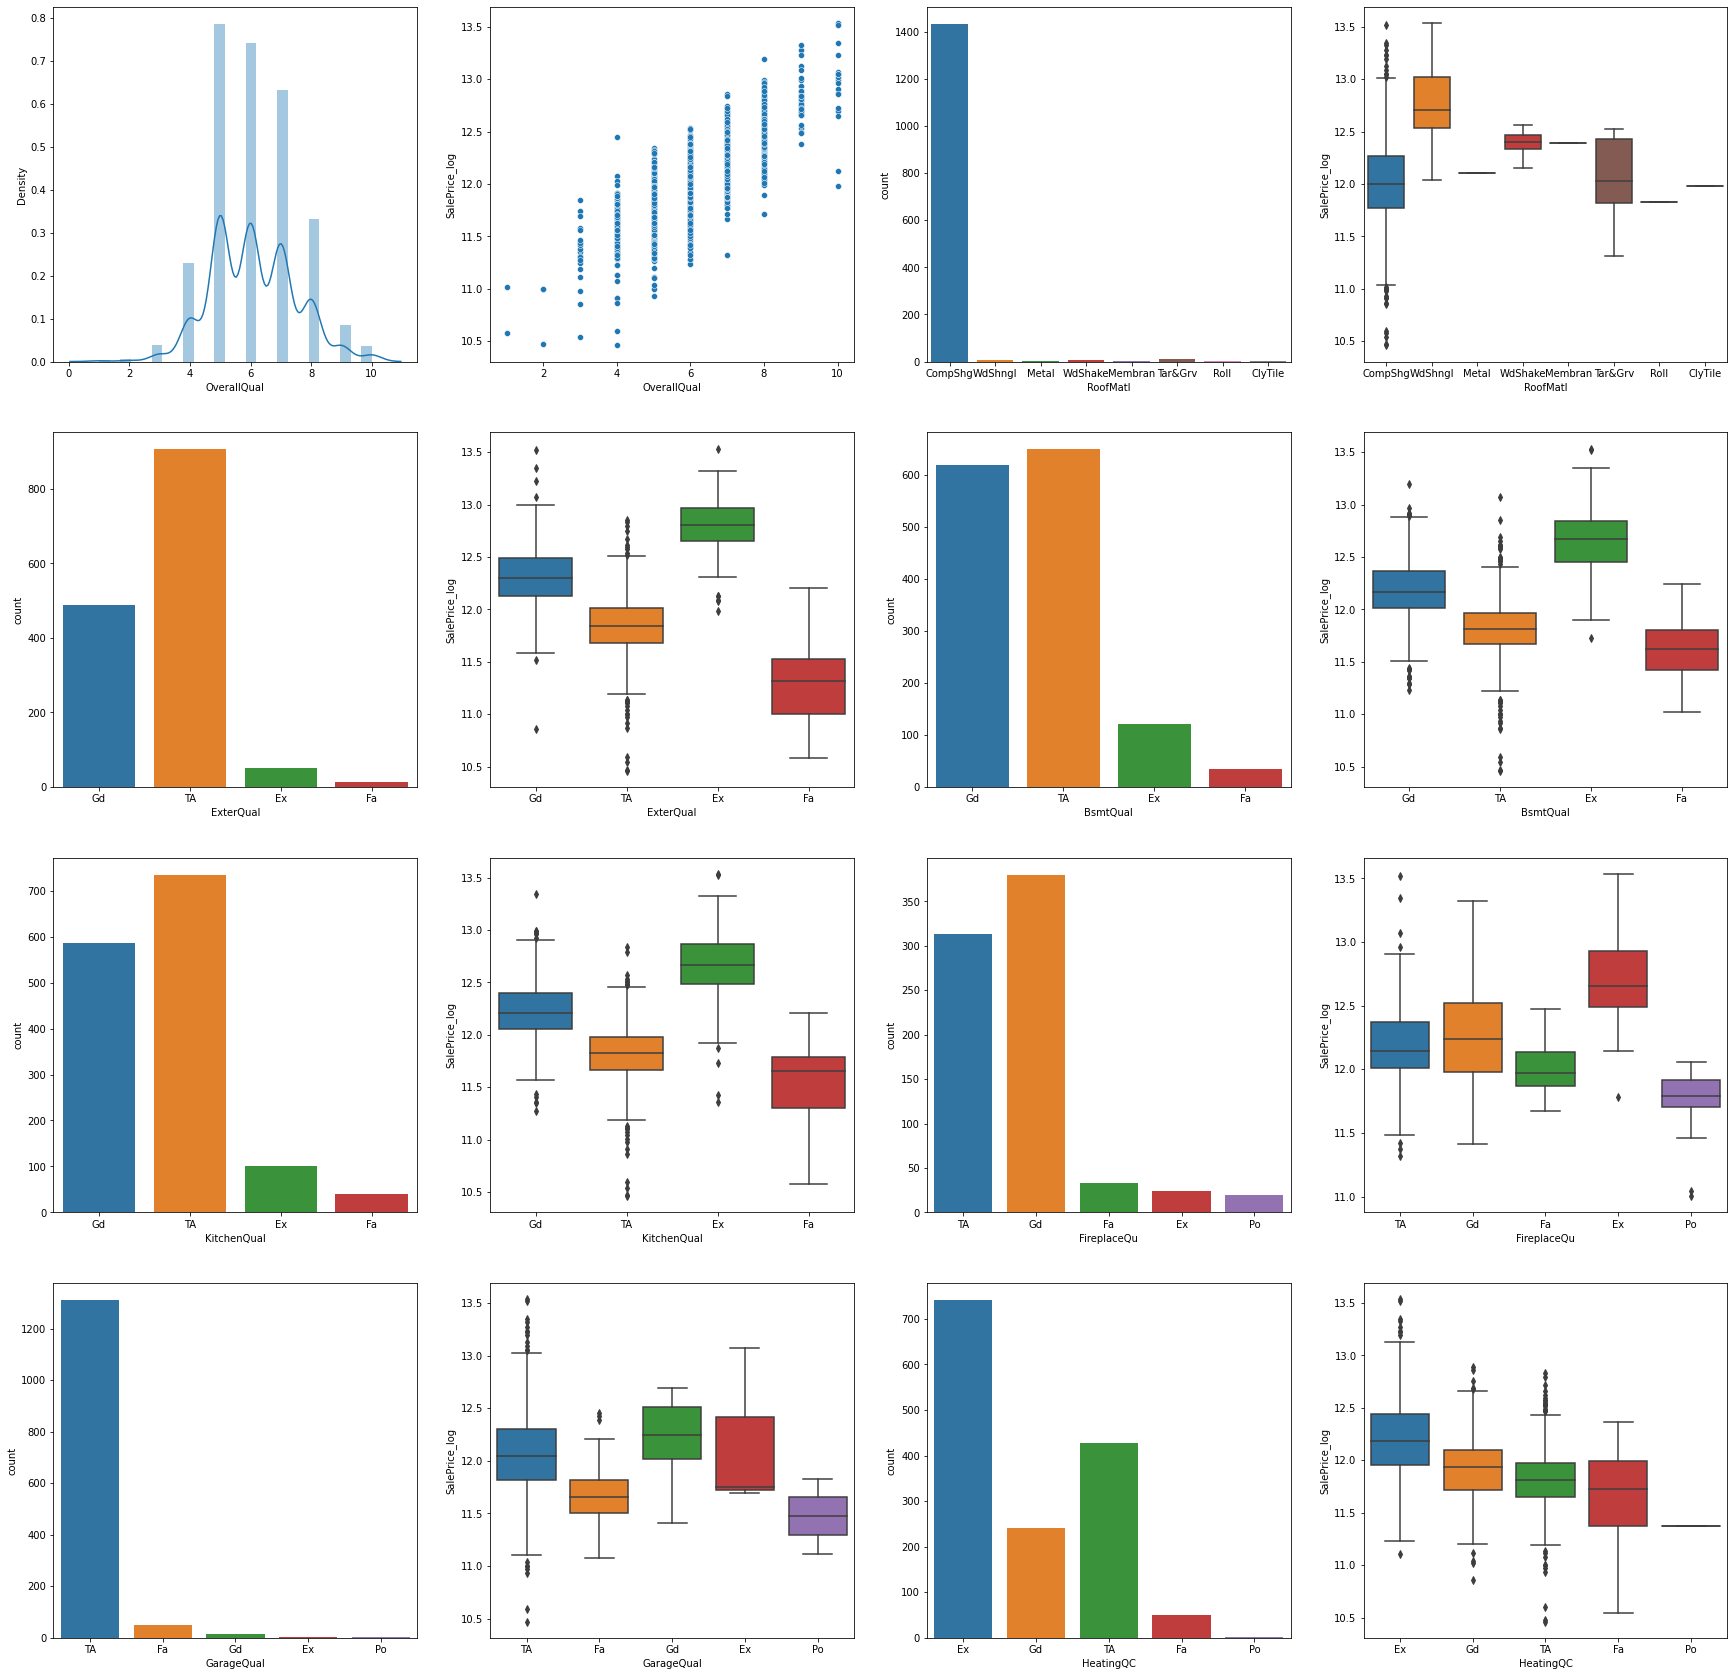

In [747]:
fig, ax = plt.subplots(4,4, figsize = (30,30))
sns.distplot(df_quality["OverallQual"], ax = ax[0][0])
sns.scatterplot(x = 'OverallQual', y = 'SalePrice_log', data = df_quality, ax = ax[0][1])
sns.countplot(df_quality["RoofMatl"], ax= ax[0][2])
sns.boxplot(x = 'RoofMatl', y = 'SalePrice_log', data = df_quality, ax = ax[0][3])
sns.countplot(df_quality["ExterQual"], ax= ax[1][0])
sns.boxplot(x = 'ExterQual', y = 'SalePrice_log', data = df_quality, ax = ax[1][1])
sns.countplot(df_quality["BsmtQual"], ax= ax[1][2])
sns.boxplot(x = 'BsmtQual', y = 'SalePrice_log', data = df_quality, ax = ax[1][3])
sns.countplot(df_quality["KitchenQual"], ax= ax[2][0])
sns.boxplot(x = 'KitchenQual', y = 'SalePrice_log', data = df_quality, ax = ax[2][1])
sns.countplot(df_quality["FireplaceQu"], ax= ax[2][2])
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice_log', data = df_quality, ax = ax[2][3])
sns.countplot(df_quality["GarageQual"], ax= ax[3][0])
sns.boxplot(x = 'GarageQual', y = 'SalePrice_log', data = df_quality, ax = ax[3][1])
sns.countplot(df_quality["HeatingQC"], ax= ax[3][2])
sns.boxplot(x = 'HeatingQC', y = 'SalePrice_log', data = df_quality, ax = ax[3][3])

In [784]:
df_quality = df_quality[df_quality["ExterQual"].isin(["Gd","TA"])] 
df_quality = df_quality[df_quality["BsmtQual"].isin(["Gd","TA"])]
df_quality = df_quality[df_quality["KitchenQual"].isin(["Gd","TA"])] 
#df_quality = df_quality[df_quality["FireplaceQu"].isin(["Gd","TA"])] 
df_quality = df_quality[df_quality["HeatingQC"].isin(["Gd","TA", "Ex"])]                   

In [789]:
df_quality.shape

(1153, 10)

In [786]:
table_quality = pd.pivot_table(df_quality, index = ["ExterQual","KitchenQual","BsmtQual", "HeatingQC"], values = ["SalePrice"], aggfunc = [np.mean])
table_quality = table_quality.reset_index()
table_quality = table_quality.sort_values([('mean','SalePrice')], ascending=False)
table_quality = table_quality.reset_index()

In [788]:
table_quality

,index,ExterQual,KitchenQual,BsmtQual,HeatingQC,mean
,,,,,,SalePrice
0,2,Gd,Gd,Gd,TA,247797.000000
1,1,Gd,Gd,Gd,Gd,229813.833333
2,5,Gd,Gd,TA,TA,229744.750000
3,6,Gd,TA,Gd,Ex,221266.428571
4,0,Gd,Gd,Gd,Ex,218657.182410
5,12,TA,Gd,Gd,Ex,196044.324324
6,3,Gd,Gd,TA,Ex,189166.666667
7,8,Gd,TA,Gd,TA,188475.000000
8,14,TA,Gd,Gd,TA,185250.000000


# EDA for category "amenities"

In [637]:
df_amenities = df[amenities]

In [638]:
df_amenities.shape

(1460, 5)

In [639]:
df_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FullBath       1460 non-null   int64  
 1   Heating        1460 non-null   object 
 2   CentralAir     1460 non-null   object 
 3   Electrical     1459 non-null   object 
 4   SalePrice_log  1460 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 57.2+ KB


/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice_log'>

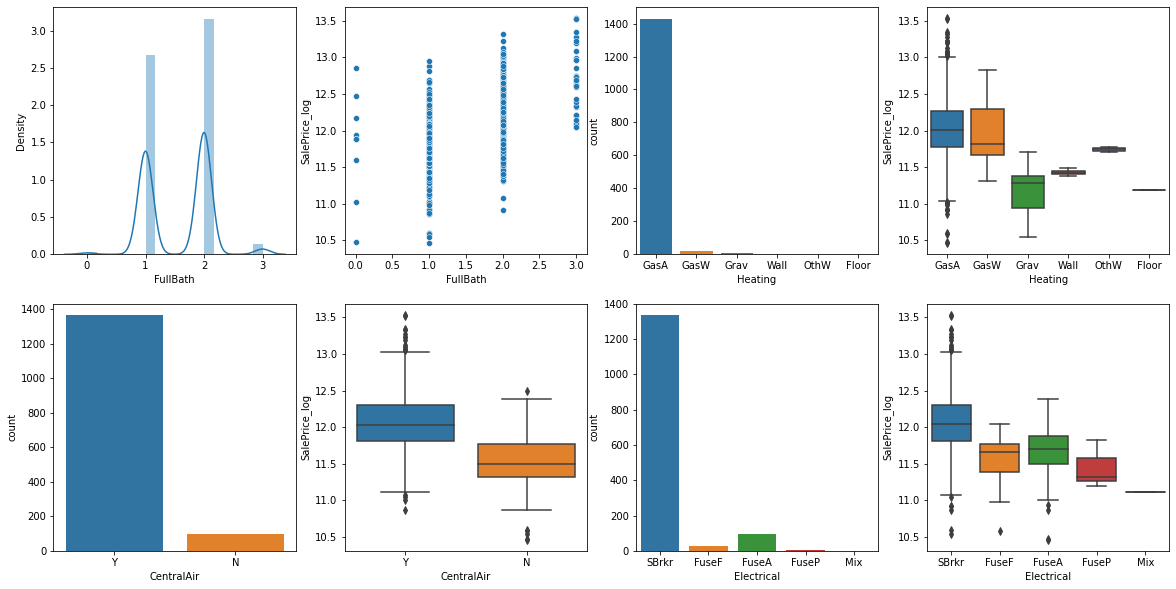

In [640]:
fig, ax = plt.subplots(2,4, figsize = (20,10))
sns.distplot(df_amenities["FullBath"], ax = ax[0][0])
sns.scatterplot(x = 'FullBath', y = 'SalePrice_log', data = df_amenities, ax = ax[0][1])
sns.countplot(df_amenities["Heating"], ax= ax[0][2])
sns.boxplot(x = 'Heating', y = 'SalePrice_log', data = df_amenities, ax = ax[0][3])
sns.countplot(df_amenities["CentralAir"], ax= ax[1][0])
sns.boxplot(x = 'CentralAir', y = 'SalePrice_log', data = df_amenities, ax = ax[1][1])
sns.countplot(df_amenities["Electrical"], ax= ax[1][2])
sns.boxplot(x = 'Electrical', y = 'SalePrice_log', data = df_amenities, ax = ax[1][3])


# EDA for category "access"

In [458]:
df_access = df[access]

In [459]:
df_access.shape

(1460, 4)

In [460]:
df_access.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Street         1460 non-null   object 
 1   Utilities      1460 non-null   object 
 2   Neighborhood   1460 non-null   object 
 3   SalePrice_log  1460 non-null   float64
dtypes: float64(1), object(3)
memory usage: 45.8+ KB


In [461]:
df_access.describe()

,SalePrice_log
count,1460.000000
mean,12.024057
std,0.399449
min,10.460271
25%,11.775105
50%,12.001512
75%,12.273736
max,13.534474


/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice_log'>

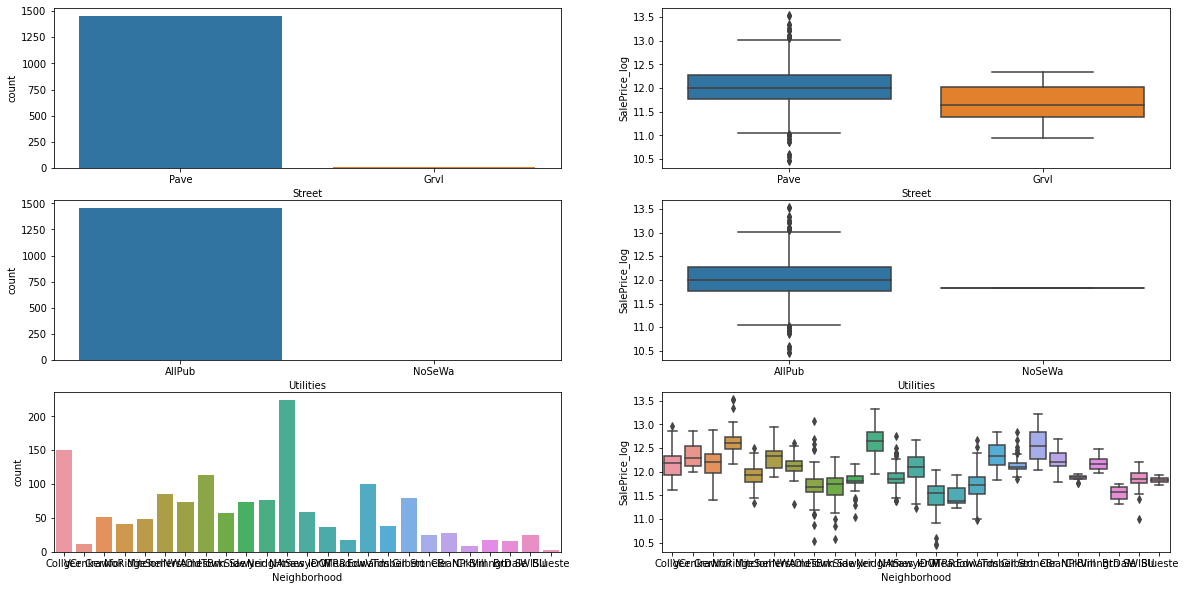

In [462]:
fig, ax = plt.subplots(3,2, figsize = (20,10))
sns.countplot(df_access["Street"], ax = ax[0][0])
sns.boxplot(x = 'Street', y = 'SalePrice_log', data = df_access, ax = ax[0][1])
sns.countplot(df_access["Utilities"], ax= ax[1][0])
sns.boxplot(x = 'Utilities', y = 'SalePrice_log', data = df_access, ax = ax[1][1])
sns.countplot(df_access["Neighborhood"], ax= ax[2][0])
sns.boxplot(x = 'Neighborhood', y = 'SalePrice_log', data = df_access, ax = ax[2][1])


# EDA for category "description"

In [790]:
df_description = df[description]

In [791]:
df_description.shape

(1460, 10)

In [792]:
df_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LandSlope      1460 non-null   object 
 2   BldgType       1460 non-null   object 
 3   HouseStyle     1460 non-null   object 
 4   RoofStyle      1460 non-null   object 
 5   SaleType       1460 non-null   object 
 6   SaleCondition  1460 non-null   object 
 7   SalePrice_log  1460 non-null   float64
 8   LandContour    1460 non-null   object 
 9   SalePrice      1460 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 114.2+ KB


/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice_log'>

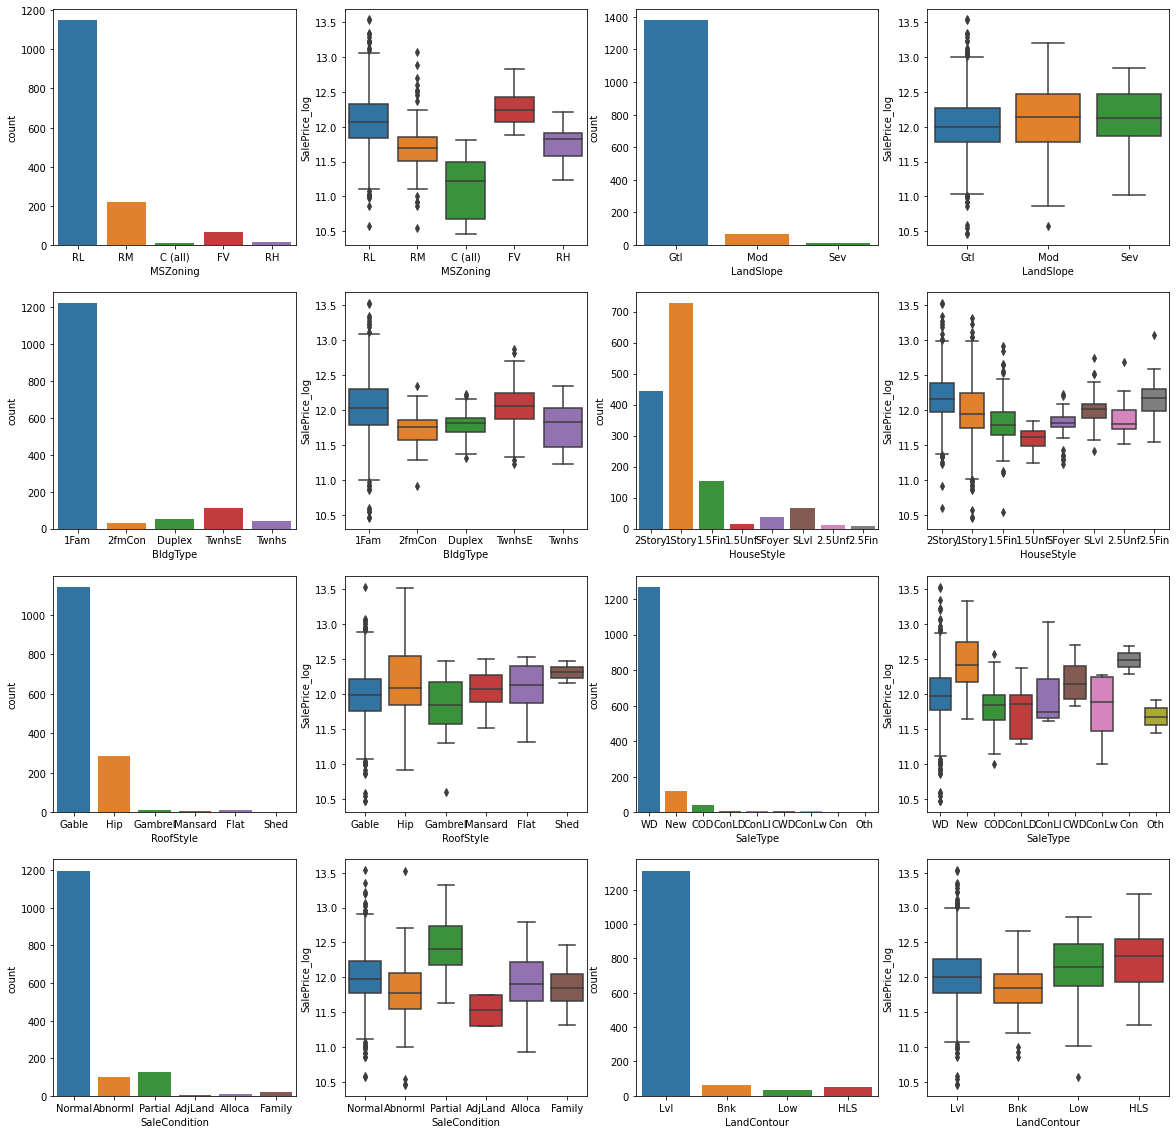

In [739]:
fig, ax = plt.subplots(4,4, figsize = (20,20))
sns.countplot(df_description["MSZoning"], ax = ax[0][0])
sns.boxplot(x = 'MSZoning', y = 'SalePrice_log', data = df_description, ax = ax[0][1])
sns.countplot(df_description["LandSlope"], ax= ax[0][2])
sns.boxplot(x = 'LandSlope', y = 'SalePrice_log', data = df_description, ax = ax[0][3])
sns.countplot(df_description["BldgType"], ax= ax[1][0])
sns.boxplot(x = 'BldgType', y = 'SalePrice_log', data = df_description, ax = ax[1][1])
sns.countplot(df_description["HouseStyle"], ax= ax[1][2])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice_log', data = df_description, ax = ax[1][3])
sns.countplot(df_description["RoofStyle"], ax= ax[2][0])
sns.boxplot(x = 'RoofStyle', y = 'SalePrice_log', data = df_description, ax = ax[2][1])
sns.countplot(df_description["SaleType"], ax= ax[2][2])
sns.boxplot(x = 'SaleType', y = 'SalePrice_log', data = df_description, ax = ax[2][3])
sns.countplot(df_description["SaleCondition"], ax= ax[3][0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice_log', data = df_description, ax = ax[3][1])
sns.countplot(df_description["LandContour"], ax= ax[3][2])
sns.boxplot(x = 'LandContour', y = 'SalePrice_log', data = df_description, ax = ax[3][3])

In [793]:
df_description = df_description[df_description["RoofStyle"].isin(["Gable","Hip"])]  
df_description = df_description[df_description["HouseStyle"].isin(["2Story","1Story"])]
df_description = df_description[df_description["MSZoning"].isin(["RL","RM"])]


In [794]:
df_description.shape

(1067, 10)

In [795]:
table_description = pd.pivot_table(df_description, index = ["HouseStyle","RoofStyle","MSZoning"], values = ["SalePrice"], aggfunc = [np.mean])
table_description=  table_description.reset_index()
table_description = table_description.sort_values([('mean','SalePrice')], ascending=False)
table_description = table_description.reset_index()


In [797]:
table_description

,index,HouseStyle,RoofStyle,MSZoning,mean
,,,,,SalePrice
0,6,2Story,Hip,RL,308156.755102
1,4,2Story,Gable,RL,217221.426966
2,2,1Story,Hip,RL,210639.457447
3,0,1Story,Gable,RL,167826.232719
4,3,1Story,Hip,RM,165872.214286
5,7,2Story,Hip,RM,131250.000000
6,5,2Story,Gable,RM,117672.000000
7,1,1Story,Gable,RM,115757.211538


# EDA for category "condition"

In [849]:
df_condition = df[condition]

In [850]:
df_condition.shape

(1460, 10)

In [851]:
df_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   GarageYrBlt   1379 non-null   float64
 3   Condition1    1460 non-null   object 
 4   Condition2    1460 non-null   object 
 5   ExterCond     1460 non-null   object 
 6   BsmtCond      1423 non-null   object 
 7   GarageCond    1379 non-null   object 
 8   Functional    1460 non-null   object 
 9   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 114.2+ KB


/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

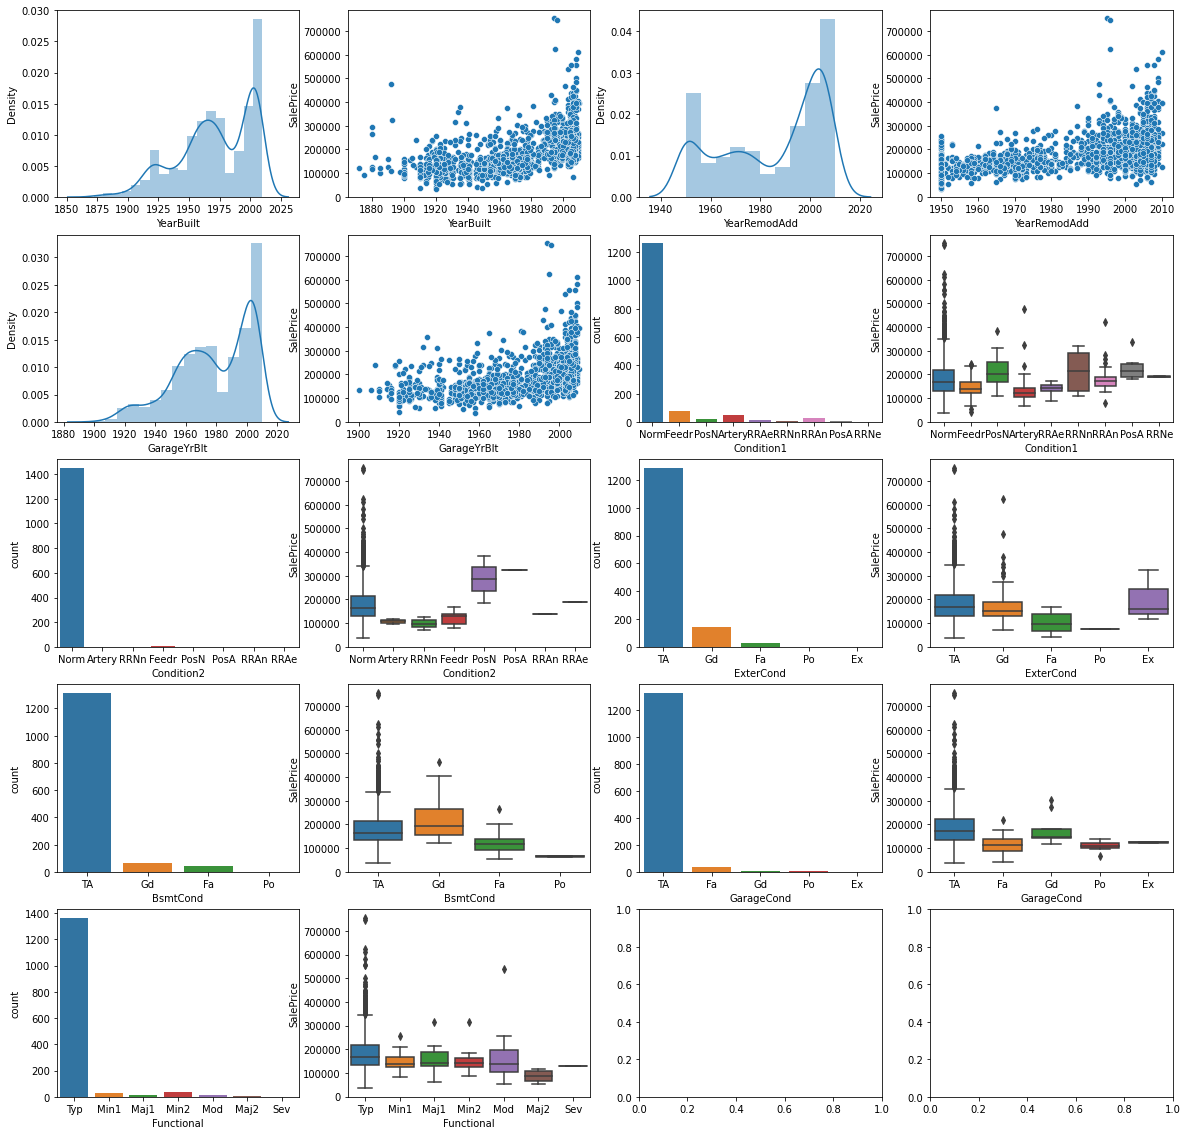

In [852]:
fig, ax = plt.subplots(5,4, figsize = (20,20))
sns.distplot(df_condition["YearBuilt"], ax = ax[0][0])
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = df_condition, ax = ax[0][1])
sns.distplot(df_condition["YearRemodAdd"], ax = ax[0][2])
sns.scatterplot(x = 'YearRemodAdd', y = 'SalePrice', data = df_condition, ax = ax[0][3])
sns.distplot(df_condition["GarageYrBlt"], ax = ax[1][0])
sns.scatterplot(x = 'GarageYrBlt', y = 'SalePrice', data = df_condition, ax = ax[1][1])
sns.countplot(df_condition["Condition1"], ax = ax[1][2])
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df_condition, ax = ax[1][3])
sns.countplot(df_condition["Condition2"], ax = ax[2][0])
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df_condition, ax = ax[2][1])
sns.countplot(df_condition["ExterCond"], ax = ax[2][2])
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = df_condition, ax = ax[2][3])
sns.countplot(df_condition["BsmtCond"], ax = ax[3][0])
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = df_condition, ax = ax[3][1])
sns.countplot(df_condition["GarageCond"], ax = ax[3][2])
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df_condition, ax = ax[3][3])
sns.countplot(df_condition["Functional"], ax = ax[4][0])
sns.boxplot(x = 'Functional', y = 'SalePrice', data = df_condition, ax = ax[4][1])


# EDA for category "space"

In [489]:
df_space = df[space]

In [490]:
df_space.shape

(1460, 7)

In [491]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GarageArea     1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   TotRmsAbvGrd   1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   1stFlrSF       1460 non-null   int64  
 5   GarageCars     1460 non-null   int64  
 6   SalePrice_log  1460 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 80.0 KB


In [492]:
df_space.describe()

,GarageArea,GrLivArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,GarageCars,SalePrice_log
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,472.980137,1515.463699,6.517808,1057.429452,1162.626712,1.767123,12.024057
std,213.804841,525.480383,1.625393,438.705324,386.587738,0.747315,0.399449
min,0.000000,334.000000,2.000000,0.000000,334.000000,0.000000,10.460271
25%,334.500000,1129.500000,5.000000,795.750000,882.000000,1.000000,11.775105
50%,480.000000,1464.000000,6.000000,991.500000,1087.000000,2.000000,12.001512
75%,576.000000,1776.750000,7.000000,1298.250000,1391.250000,2.000000,12.273736
max,1418.000000,5642.000000,14.000000,6110.000000,4692.000000,4.000000,13.534474


/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice_log'>

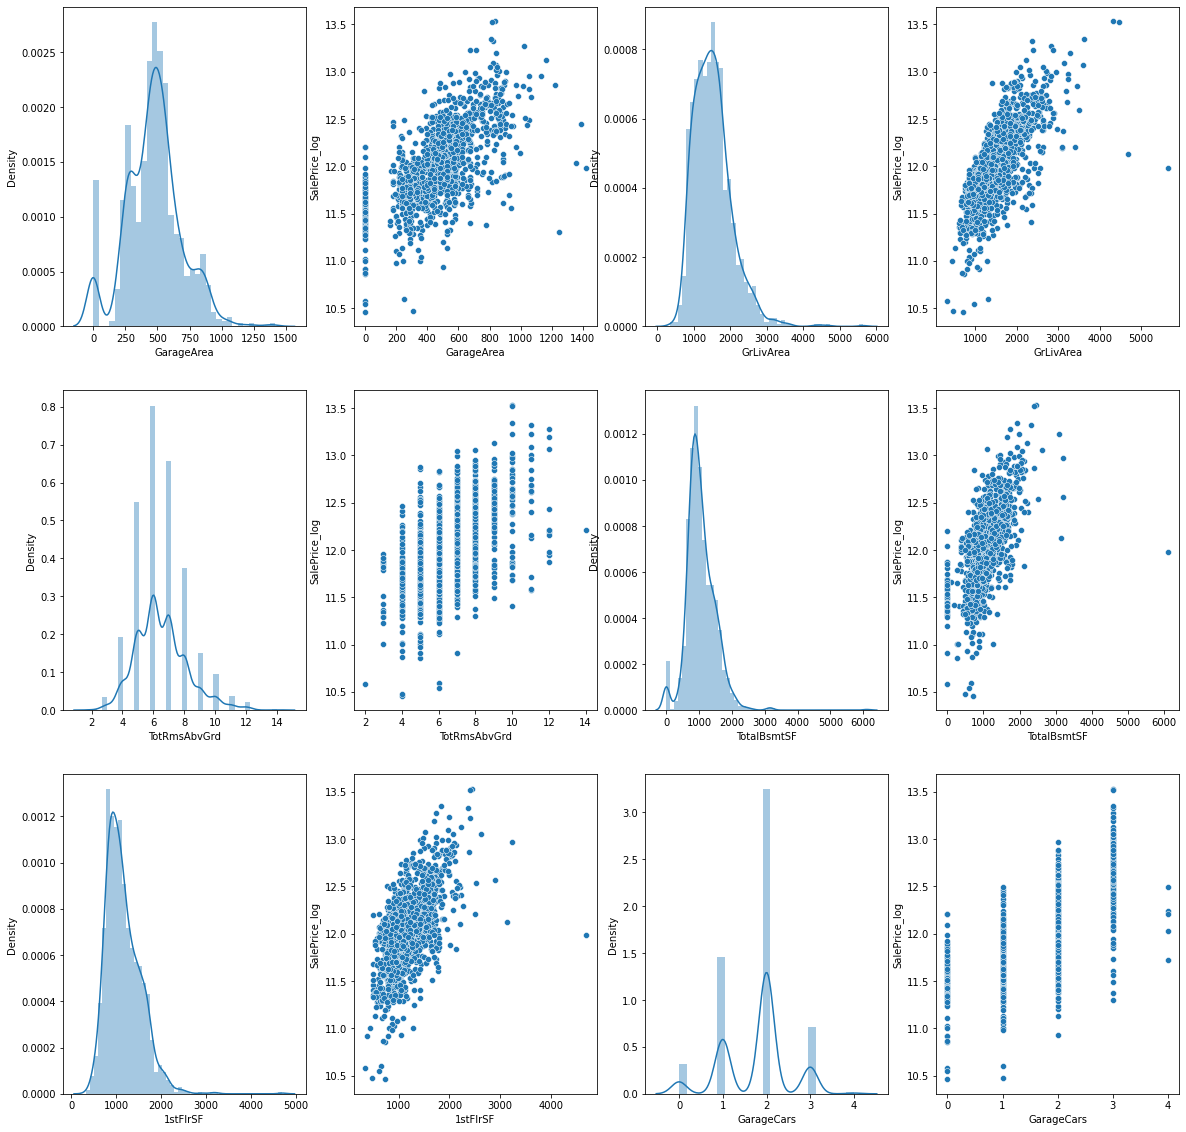

In [495]:
fig, ax = plt.subplots(3,4, figsize = (20,20))
sns.distplot(df_space["GarageArea"], ax = ax[0][0])
sns.scatterplot(x = 'GarageArea', y = 'SalePrice_log', data = df_space, ax = ax[0][1])
sns.distplot(df_space["GrLivArea"], ax = ax[0][2])
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice_log', data = df_space, ax = ax[0][3])
sns.distplot(df_space["TotRmsAbvGrd"], ax = ax[1][0])
sns.scatterplot(x = 'TotRmsAbvGrd', y = 'SalePrice_log', data = df_space, ax = ax[1][1])
sns.distplot(df_space["TotalBsmtSF"], ax = ax[1][2])
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice_log', data = df_space, ax = ax[1][3])
sns.distplot(df_space["1stFlrSF"], ax = ax[2][0])
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice_log', data = df_space, ax = ax[2][1])
sns.distplot(df_space["GarageCars"], ax = ax[2][2])
sns.scatterplot(x = 'GarageCars', y = 'SalePrice_log', data = df_space, ax = ax[2][3])

# EDA for category "design"

In [834]:
df_design = df[design]

In [835]:
df_design.shape

(1460, 14)

In [829]:
df_design.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotShape       1460 non-null   object 
 1   LotConfig      1460 non-null   object 
 2   GarageType     1379 non-null   object 
 3   BsmtExposure   1422 non-null   object 
 4   GarageFinish   1379 non-null   object 
 5   Foundation     1460 non-null   object 
 6   SalePrice      1460 non-null   int64  
 7   PavedDrive     1460 non-null   object 
 8   SalePrice_log  1460 non-null   float64
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  BsmtFinType1   1423 non-null   object 
 12  BsmtFinType2   1422 non-null   object 
 13  MasVnrType     1452 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 159.8+ KB


/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/site-packages/seaborn

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

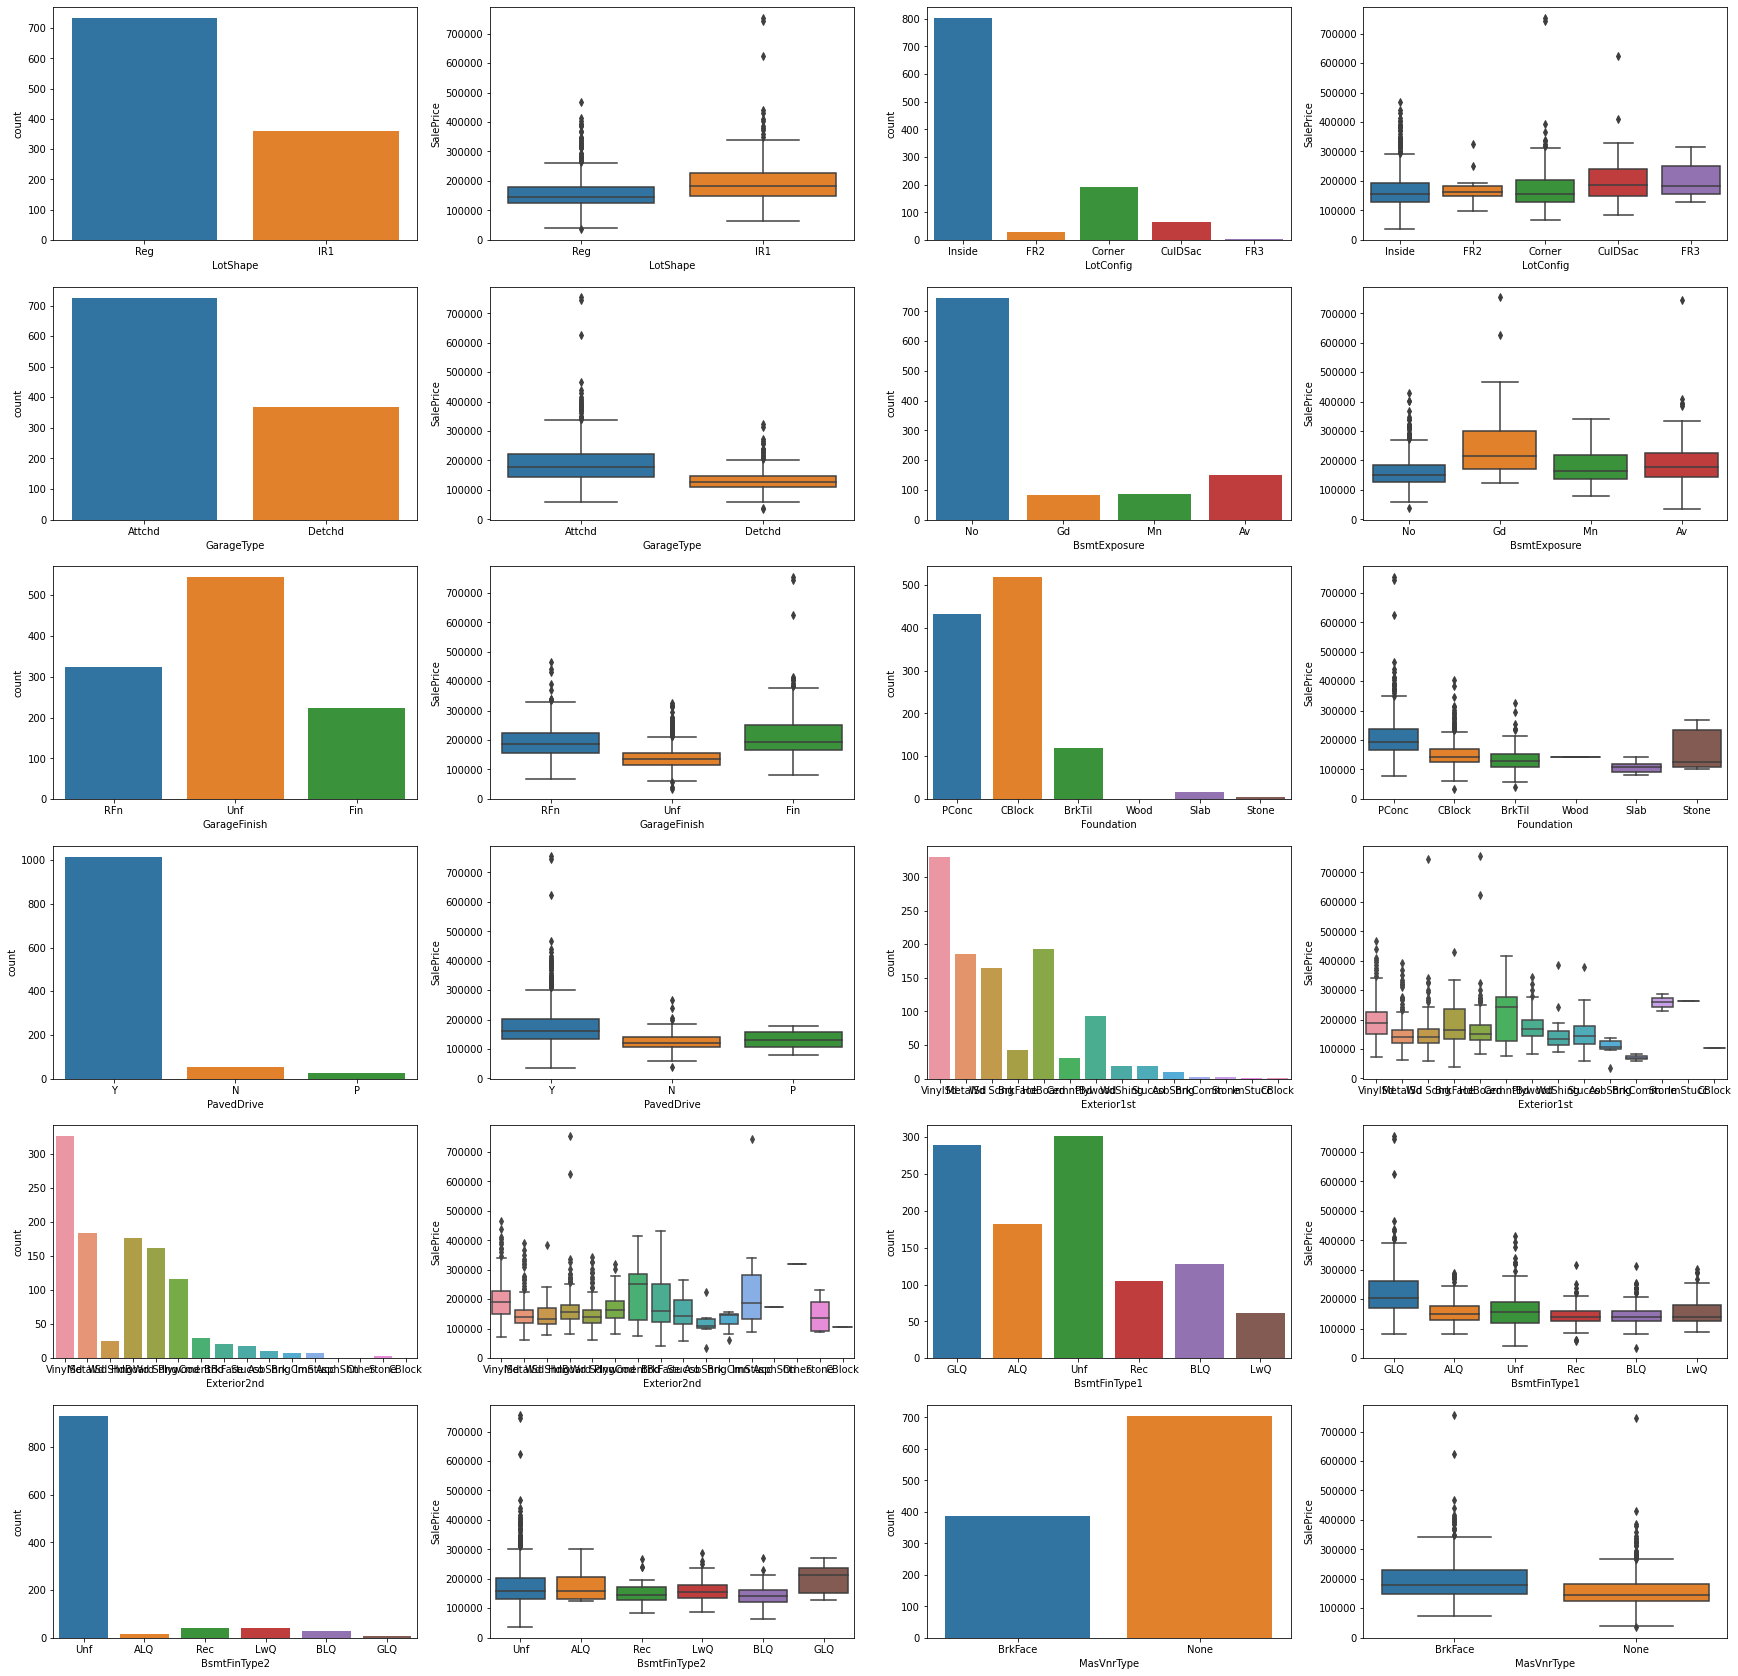

In [873]:
fig, ax = plt.subplots(6,4, figsize = (30,30))
sns.countplot(df_design["LotShape"], ax = ax[0][0])
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df_design, ax = ax[0][1])
sns.countplot(df_design["LotConfig"], ax = ax[0][2])
m = sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df_design, ax = ax[0][3])
fig = m.get_figure()
fig.savefig("out.png") 

sns.countplot(df_design["GarageType"], ax = ax[1][0])
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df_design, ax = ax[1][1])
sns.countplot(df_design["BsmtExposure"], ax = ax[1][2])
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df_design, ax = ax[1][3])
sns.countplot(df_design["GarageFinish"], ax = ax[2][0])
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df_design, ax = ax[2][1])
sns.countplot(df_design["Foundation"], ax = ax[2][2])
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = df_design, ax = ax[2][3])
sns.countplot(df_design["PavedDrive"], ax = ax[3][0])
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = df_design, ax = ax[3][1])
sns.countplot(df_design["Exterior1st"], ax = ax[3][2])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df_design, ax = ax[3][3])
sns.countplot(df_design["Exterior2nd"], ax = ax[4][0])
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df_design, ax = ax[4][1])
sns.countplot(df_design["BsmtFinType1"], ax = ax[4][2])
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df_design, ax = ax[4][3])
sns.countplot(df_design["BsmtFinType2"], ax = ax[5][0])
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = df_design, ax = ax[5][1])
sns.countplot(df_design["MasVnrType"], ax = ax[5][2])
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df_design, ax = ax[5][3])

In [836]:
df_design = df_design[df_design["LotShape"].isin(["Reg","IR1"])]
#df_design = df_design[df_design["LotConfig"].isin(["Inside","Corner"])]
df_design = df_design[df_design["GarageType"].isin(["Attchd","Detchd"])]
#df_design = df_design[df_design["BsmtExposure"].isin(["No","Au"])]
#df_design = df_design[df_design["Foundation"].isin(["Pconc","CBlock"])]
df_design = df_design[df_design["MasVnrType"].isin(["BrkFace","None"])]

In [838]:
df_design.shape

(1093, 14)

In [844]:
table_design = pd.pivot_table(df_design,
                       index = ["LotShape","GarageType","GarageFinish","MasVnrType"],
                       values = ["SalePrice"], 
                       aggfunc = [np.mean])
table_design = table_design.reset_index()
table_design = table_design.sort_values([('mean', 'SalePrice')], ascending=False)
table_design = table_design.reset_index()

In [845]:
table_design

,index,LotShape,GarageType,GarageFinish,MasVnrType,mean
,,,,,,SalePrice
0,0,IR1,Attchd,Fin,BrkFace,261893.333333
1,7,IR1,Detchd,RFn,BrkFace,239000.000000
2,1,IR1,Attchd,Fin,None,221323.611111
3,11,Reg,Attchd,Fin,BrkFace,220114.661765
4,2,IR1,Attchd,RFn,BrkFace,219757.626866
5,3,IR1,Attchd,RFn,None,197835.206349
6,12,Reg,Attchd,Fin,None,196994.953488
7,13,Reg,Attchd,RFn,BrkFace,193304.225806
8,14,Reg,Attchd,RFn,None,182543.364706


# Analysis of SalePrice with different categories

<AxesSubplot:>

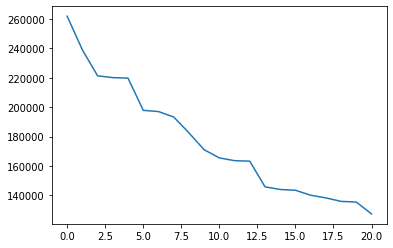

In [846]:
table_design[('mean', 'SalePrice')].plot()

<AxesSubplot:>

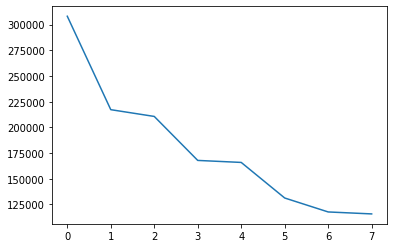

In [805]:
table_description[('mean', 'SalePrice')].plot()

<AxesSubplot:>

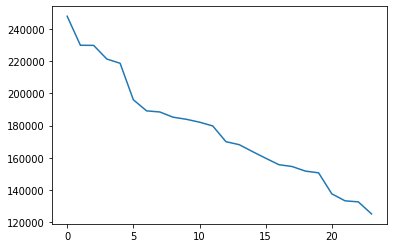

In [806]:
table_quality[('mean', 'SalePrice')].plot()

In [855]:
list1 = ["HouseStyle","RoofStyle","MSZoning","LotShape","GarageType",
         "GarageFinish","MasVnrType","ExterQual","KitchenQual","BsmtQual", 
         "HeatingQC","SalePrice"]


In [863]:
df_list = df[list1]

In [864]:
table = pd.pivot_table(df_list, index =["HouseStyle","RoofStyle","MSZoning","LotShape","GarageType",
         "GarageFinish","MasVnrType","ExterQual","KitchenQual","BsmtQual", 
         "HeatingQC"], values = ["SalePrice"], aggfunc = [np.mean])

In [865]:
table = table.reset_index()
table = table.sort_values([('mean', 'SalePrice')], ascending=False)
table = table.reset_index()

In [869]:
table.head(20)

,index,HouseStyle,RoofStyle,MSZoning,LotShape,GarageType,GarageFinish,MasVnrType,ExterQual,KitchenQual,BsmtQual,HeatingQC,mean
,,,,,,,,,,,,,SalePrice
0,494,2Story,Gable,RL,IR1,Attchd,Fin,BrkFace,Ex,Ex,Ex,Ex,755000.0
1,688,2Story,Hip,RL,IR1,Attchd,Fin,None,Gd,Ex,Ex,Ex,745000.0
2,684,2Story,Hip,RL,IR1,Attchd,Fin,BrkFace,Gd,Gd,Ex,Ex,625000.0
3,725,2Story,Hip,RL,Reg,BuiltIn,RFn,Stone,Ex,Ex,Ex,Ex,582933.0
4,698,2Story,Hip,RL,IR1,BuiltIn,Fin,Stone,Gd,Ex,Ex,Ex,556581.0
5,703,2Story,Hip,RL,IR2,BuiltIn,Fin,BrkFace,Ex,Ex,Gd,Ex,538000.0
6,724,2Story,Hip,RL,Reg,BuiltIn,Fin,Stone,Ex,Ex,Ex,Ex,485000.0
7,456,2.5Fin,Gable,RM,IR2,Detchd,Unf,None,Gd,Ex,TA,Ex,475000.0
8,555,2Story,Gable,RL,IR1,BuiltIn,RFn,Stone,Ex,Ex,Ex,Ex,451950.0


In [870]:
table.tail(20)

,index,HouseStyle,RoofStyle,MSZoning,LotShape,GarageType,GarageFinish,MasVnrType,ExterQual,KitchenQual,BsmtQual,HeatingQC,mean
,,,,,,,,,,,,,SalePrice
804,449,1Story,Hip,RM,Reg,Detchd,Unf,None,TA,TA,TA,TA,85000.0
805,652,2Story,Gable,RM,Reg,Attchd,Unf,None,TA,TA,Gd,TA,85000.0
806,670,2Story,Gable,RM,Reg,Detchd,Unf,None,TA,TA,TA,TA,84000.0
807,282,1Story,Gable,RL,Reg,Basment,Unf,None,TA,TA,TA,Fa,83000.0
808,112,1Story,Gable,RH,Reg,CarPort,Unf,None,Fa,TA,TA,Gd,82000.0
809,98,1Story,Gable,C (all),Reg,Detchd,RFn,None,Fa,TA,TA,TA,81000.0
810,762,SFoyer,Gable,RM,Reg,Attchd,Unf,None,TA,TA,Gd,TA,80000.0
811,41,1.5Fin,Gable,RL,Reg,Detchd,Unf,None,TA,Fa,Gd,Fa,80000.0
812,184,1Story,Gable,RL,IR1,Detchd,Unf,BrkFace,TA,TA,Fa,Gd,79900.0
